## 台灣身份證比對

In [2]:
%pylab inline
import time
import cv2
import openface
import numpy as np
import glob 
from matplotlib import pyplot as plt
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


## 載入 AlignDlib

In [3]:
# 需要很多時間
align = openface.AlignDlib("/root/openface/models/dlib/shape_predictor_68_face_landmarks.dat")

### 同時多人臉偵測

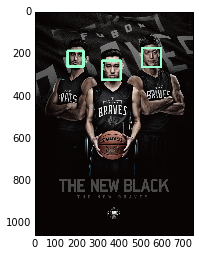

In [7]:
bgrImg = cv2.imread("images/fubon3face.jpg")
rgbImg = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2RGB)
bbs = align.getAllFaceBoundingBoxes(rgbImg)

copyImg = np.copy(rgbImg)

for bb in bbs:
    bl = (bb.left(), bb.bottom())
    tr = (bb.right(), bb.top())
    cv2.rectangle(copyImg, bl, tr, color=(153, 255, 204), thickness=10)
    
plt.imshow(copyImg)

### 載入身份證

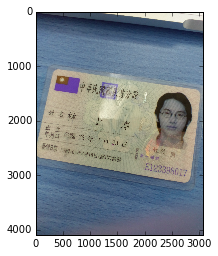

In [15]:
bgrImg = cv2.imread("images/samCard3.jpg")
plt.imshow(bgrImg)

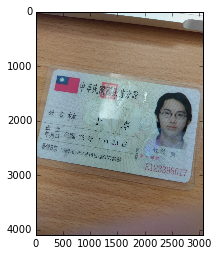

In [16]:
rgbImg = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2RGB)
plt.imshow(rgbImg)

In [17]:
# 需要花費許多時間
bb = align.getLargestFaceBoundingBox(rgbImg)
bb

rectangle(2194,1702,2749,2256)

### 人臉偵測

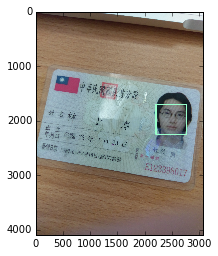

In [20]:
bl = (bb.left(), bb.bottom())
tr = (bb.right(), bb.top())
copyImg = np.copy(rgbImg)
type(rgbImg)
cv2.rectangle(copyImg, bl, tr, color=(153, 255, 204), thickness=20)
plt.imshow(copyImg)

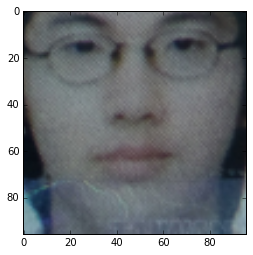

In [21]:
alignedFace = align.align(96, rgbImg, bb, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
plt.imshow(alignedFace)

In [22]:
net = openface.TorchNeuralNet("/root/openface/models/openface/nn4.small2.v1.t7", 96)
rep = net.forward(alignedFace)
rep.shape

(128,)

### 載入比對影像或照片

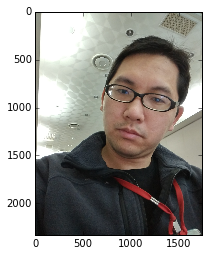

In [24]:
# Load 比對照片
testBgrImg = cv2.imread("images/samPic2.jpg")
testRgbImg = cv2.cvtColor(testBgrImg, cv2.COLOR_BGR2RGB)
plt.imshow(testRgbImg)

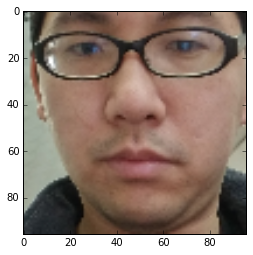

In [25]:
# 擷取人臉影像
testBb = align.getLargestFaceBoundingBox(testRgbImg)
testAlignedFace = align.align(96, testRgbImg, testBb, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
plt.imshow(testAlignedFace)

In [26]:
net = openface.TorchNeuralNet("/root/openface/models/openface/nn4.small2.v1.t7", 96)
testRep = net.forward(testAlignedFace)
testRep.shape

(128,)

In [27]:
d = rep - testRep
d
np.dot(d, d)

0.58402729495462435

## Done!!